Introduction

In this project I have imported data regarding the absenteeism of a company. The data is relatively clean without any "null" values or missing inputs. Many of the attributes are labeled as a "0" or a "1" determining whether that category is true for the individual or not. Other attributes are self explanatory. There will be three sections to the project: introduction, three questions and the work that supports the answer, and the conclusion. When completed I hope to show a relationship between at least one of the attributes and the amount of absenteeism for the workers.

In [2]:
#Here I imported the necessary files to complete the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [3]:
#In this cell the dataframe was created from the csv file.
df_abs = pd.read_csv('Absenteeism_at_work.csv')

In this section I begin my exploration of the data set. First I looked at the overall structure of the dataframe, then I used the "describe" function to see some of the statistical high lights. From there I used the called the "info" function to determine the data types and the number of null values. 

In [4]:
#Taking a quick peak at the dataframe to be sure it looks the way I expected.
df_abs.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


In [5]:
#The column names were difficult to remember and to use in the coding. I changed the column names for an easier code.
df_abs=df_abs.rename(columns={'Reason for absence':'reason','Month of absence':'month','Day of the week':'day','Transportation expense':'trans_exp','Distance from Residence to Work':'dist_to_work',
                       'Service time':'service_time','Disciplinary failure':'discipline','Son':'children','Social drinker':'social_drinker','Social smoker':'social_smoker','Body mass index':'BMI','Absenteeism time in hours':'absent_time'})
df_abs.head()

,ID,reason,month,day,Seasons,trans_exp,dist_to_work,service_time,Age,Work load Average/day,...,discipline,Education,children,social_drinker,social_smoker,Pet,Weight,Height,BMI,absent_time
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


In [6]:
#This is an opportunity to review the key statistics of the dataframe.
df_abs.describe()

,ID,reason,month,day,Seasons,trans_exp,dist_to_work,service_time,Age,Hit target,discipline,Education,children,social_drinker,social_smoker,Pet,Weight,Height,BMI,absent_time
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [7]:
#I am taking a good look at the data from all perspectives. This information allows me to understand what data types 
#I am working with.
df_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                        740 non-null int64
reason                    740 non-null int64
month                     740 non-null int64
day                       740 non-null int64
Seasons                   740 non-null int64
trans_exp                 740 non-null int64
dist_to_work              740 non-null int64
service_time              740 non-null int64
Age                       740 non-null int64
Work load Average/day     740 non-null object
Hit target                740 non-null int64
discipline                740 non-null int64
Education                 740 non-null int64
children                  740 non-null int64
social_drinker            740 non-null int64
social_smoker             740 non-null int64
Pet                       740 non-null int64
Weight                    740 non-null int64
Height                    740 non-null int64
BMI                       740 non-null 

Following the inspection of the data, I started with a simple question, "Which employee had the most absences in the dataset?" I ran a value count on the 'ID' numbers to determine the number of times the data showed a particular ID number. It appears that ID #3 has the most reported absences during the time frame. I then displayed the ID numbers and absences on a scater plot to get an idea for the shape of the data. Again, employee number 3 stood out in the scatter plot as an outlier, well above the others in number of absences. These two visuals led me to ask what is the distribution of absences for the employees by ID number. The histogram at the end provided a good visual of how the absences are dispursed among the employees. This being skewed to the right shows that the employees do not seem to abuse the absenteeism in this company.

In [8]:
#This is a quick look at the number of absences per employee. ID number 3 seems to have the most.
emp_abs = df_abs['ID'].value_counts()
print(emp_abs)

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64


In [32]:
emp_abs.describe()

count     36.000000
mean      20.555556
std       23.695020
min        1.000000
25%        5.000000
50%        9.000000
75%       29.250000
max      113.000000
Name: ID, dtype: float64

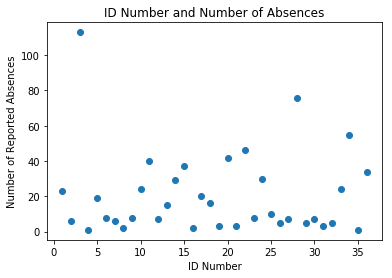

In [9]:
#This scatter plot shows no relationship between the ID number and the Number of absences. It is a good visual to determine
#if there are any outliers. You can see that employee with ID number 3 is an outlier with over 100 absences.
plt.scatter(emp_abs.index, emp_abs);
plt.xlabel('ID Number')
plt.ylabel('Number of Reported Absences')
plt.title('ID Number and Number of Absences');

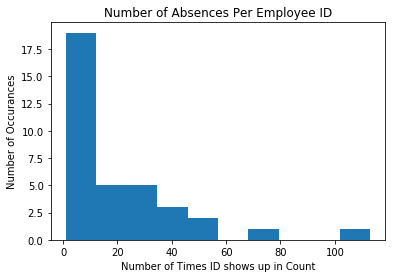

In [10]:
#A histogram of the absentee counts shows that it is skewed to the right. This is a good sign that not many employees are 
#abusing their leave.
plt.hist(df_abs['ID'].value_counts());
plt.xlabel('Number of Times ID shows up in Count');
plt.ylabel('Number of Occurances');
plt.title('Number of Absences Per Employee ID');

After assessing the number of absences per employee, I wanted to see if there was any relationships between various attributes and the amount of absenteeism times in hours. The first attribute I wanted to compare was the employees age. After grouping the data by age, I ran a scatter plot to see if there was a relationship between the age of an employee and the number hours they are absent. When it was complete the graph did not show a reasonable relationship between the two variable. There was no clear pattern to the scatter plot. This was followed up with a line plot of the average absenteeism for each age. This still did not show a solid pattern that could be used for prediction.

In [11]:
#I created a dataframe that had the age of the employees and their combined hours of abseteeism.
abs_age = df_abs.groupby(['Age']).absent_time.sum()
print(abs_age)

Age
27     27
28    651
29     31
30    253
31    217
32     48
33    538
34    476
36    346
37    465
38    482
39     30
40    379
41    275
43    187
46     16
47     73
48     25
49     16
50    327
53      0
58    262
Name: absent_time, dtype: int64


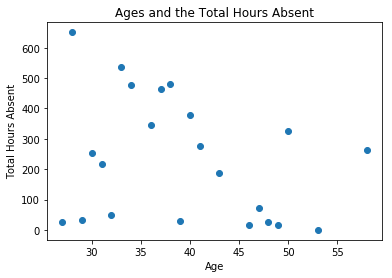

In [12]:
#The scatter plot below shows that there is no correlation between age and Absenteeism time.
plt.scatter(abs_age.index, abs_age)
plt.xlabel('Age')
plt.ylabel('Total Hours Absent')
plt.title('Ages and the Total Hours Absent');

In [13]:
#To eleviate the summation as a skewed value, I decided to find the mean of the hours absent and plot it on a line graph.
abs_age_mean=df_abs.groupby(['Age']).absent_time.mean()
print(abs_age_mean)

Age
27     3.857143
28     5.564103
29     4.428571
30     5.500000
31     9.863636
32     3.692308
33    10.549020
34    16.413793
36     6.920000
37     5.961538
38     4.265487
39     3.750000
40     6.534483
41     8.088235
43     7.791667
46     8.000000
47     3.041667
48     4.166667
49     3.200000
50     8.837838
53     0.000000
58    32.750000
Name: absent_time, dtype: float64


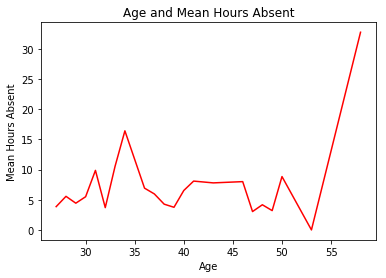

In [14]:
#This is a line graph displaying the mean hours absent and the ages of the employees.
plt.plot(abs_age_mean.index,abs_age_mean,color='red')
plt.xlabel('Age')
plt.ylabel('Mean Hours Absent')
plt.title('Age and Mean Hours Absent');

The next attribute to compare to Absenteeism time is the Social smokers. I wondered if the smokers took more time due to their health. The bar chart displays the mean time that the social smokers took off compared to the mean time of the non-smokers. It showed that the mean time for the non-smokers was actually higher than the smokers, so there was not correlation between smoking and being absent more often.

In [15]:
#Creating a dataframe with the mean absent time of the employees that are considered "social smokers."
abs_smoker = df_abs.groupby(['social_smoker']).absent_time.mean()
print(abs_smoker)

social_smoker
0    6.957726
1    6.500000
Name: absent_time, dtype: float64


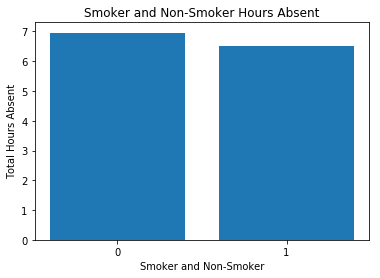

In [30]:
# It appears that on average the social smokers miss less work than the non-smokers.
plt.bar(abs_smoker.index, abs_smoker);
ax=plt.subplot()
ax.set_xticks([0,1])
plt.xlabel('Smoker and Non-Smoker')
plt.ylabel('Total Hours Absent')
plt.title('Smoker and Non-Smoker Hours Absent');

This is a quick check to see if the day of the week had any influence on the number of absences taken. Interestingly, Friday seemed to have the fewest total absences reported.

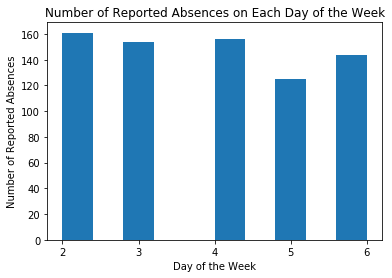

In [31]:
#Bar graph to display the number of hours missed on the days of the week.
plt.hist(df_abs['day']);
ax=plt.subplot()
ax.set_xticks([2,3,4,5,6,])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reported Absences')
plt.title('Number of Reported Absences on Each Day of the Week');

In this section I wanted to answer the question, "Does an employees service time correlate to taking more absent time?" Does an employee with more seniority take more time off? When I plotted the scatter of the two variable there seemed to be a slight positive correlation. I then found the line of regression to get a visual of how the relationship.

In [33]:
#Another dataframe with the "service time" and the corresponding "absent time mean."
abs_mean = df_abs.groupby(['service_time']).absent_time.mean()
print(abs_mean)

service_time
1      4.857143
3      7.750000
4      7.375000
6      4.428571
7      3.857143
8      4.461538
9      4.888889
10     6.254545
11     6.920000
12     7.655738
13     9.712329
14     8.235294
15     5.250000
16    13.578947
17     6.300000
18     5.394558
24     8.000000
29     3.200000
Name: absent_time, dtype: float64


[0.0272165]
6.234095319012721


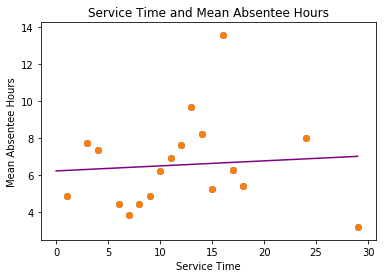

In [59]:
#In an attempt to better understant the relationship between service time and absenteeism, I created a line of regression 
#to determine if there is a strong enough relationship between the two attributes to make a predication.
X=abs_mean.index
X=X.values.reshape(-1,1)
y=abs_mean
plt.scatter(X, y,);
regr2=linear_model.LinearRegression()
regr2.fit(X, y)
plt.scatter(X,y)
print(regr2.coef_)
print(regr2.intercept_)
x=np.array(range(0, 30))
y2=(regr2.coef_*x + regr2.intercept_)
plt.plot(x,y2,color='purple')
plt.xlabel('Service Time')
plt.ylabel('Mean Absentee Hours')
plt.title('Service Time and Mean Absentee Hours');

Another question I had was, "Do parents take more time off than those without children?" This time I plotted the information on a bar plot. I compared the number of children to the mean hours the parent had taken off work. It showed that the number of children increased the number of hours (on average) that an employee took off. This seemed like a pretty strong relationship up to 3 children, then the number dropped for 4 children.

In [26]:
#Parents and their average absent time.
abs_parent = df_abs.groupby(['children']).absent_time.mean()
print(abs_parent)



children
0     5.385906
1     6.030568
2    10.570513
3    12.200000
4     7.285714
Name: Absent_time, dtype: float64


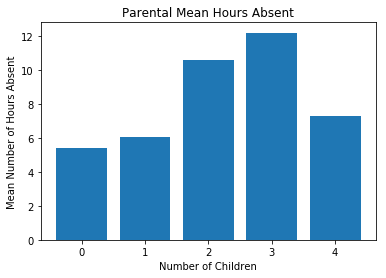

In [41]:
#Looking at this bar plot of absenteeism time in hours and the number of children employees have, you can see that
#the more children employees have the more time they are absent on average.
plt.bar(abs_parent.index, abs_parent)
plt.xlabel('Number of Children')
plt.ylabel('Mean Number of Hours Absent')
plt.title('Parental Mean Hours Absent');

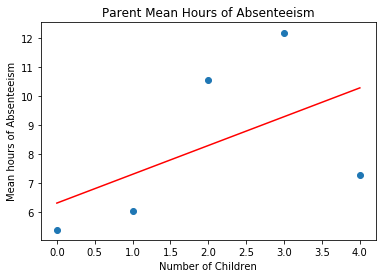

In [39]:
#With the data from the df abs_parent, I plotted the mean of the time absent for parents with the number of children they
#have. This showed a positive correlation. This led me to create the line of regression and place it on the visual. 
X=abs_parent.index
X=X.values.reshape(-1,1)
y=abs_parent
regr=linear_model.LinearRegression()
regr.fit(X, y)
plt.scatter(X,y)
x=[0,1,2,3,4,]
y2=(regr.coef_*x + regr.intercept_)
plt.plot(x,y2,color='red')
plt.xlabel('Number of Children')
plt.ylabel('Mean hours of Absenteeism')
plt.title('Parent Mean Hours of Absenteeism');

In [36]:
#I decided to print out the standard deviation and linear regression information.
abs_par_std=np.std(abs_parent)
print("The standard deviation for parent absences: "+ str(abs_par_std))
print("The linear regression slope for parent absence mean and number of children: " + str(regr.coef_))
print("The linear regression y-intercept for parent absence mean and number of children: " + str(regr.intercept_))

The standard deviation for parent absences: 2.647116225829073
The linear regression slope for parent absence mean and number of children: [0.99690488]
The linear regression y-intercept for parent absence mean and number of children: 6.300730405356588


Conclusion

The data I decided to work with concerned the absenteeism of employees at a company. This data included 27 attributes about each employee. The data was complete without any "null" cells and all of the values were stored as integers. The data started out very clean and only took a little bit of "wrangling" to get it in a good format. I started by changing the column names so that they would be easier to work with. After that I started working on a series of questions that interested me. 

The questions were: Which employee had the most absences? Does the number of years of service influence how often an employee is absent? Do the employees in general abuse absences? Are there any attributes that predict an employee will miss more than the average number of days of work?

My conclusion is that this data really does not provide enough of a population to make any absolute conclusions. This data was very clean but with only 36 employees to work with there was no overriding patterns that would lead to a prediction. With that said, only one attribute seems to be a predictor based on the information in the data set. If an employee has children they tend to miss more work than employees without. Further the more children employees have the greater the chance they will miss more work. There might be several reasons for this, sick children need supervision and many daycares will not allow ill children to attend. This leads to employees staying home to take care of them. 

I also noticed that the employees for the most part are not abusing their absences. The graph of the number of absences reported was skewed to the right meaning that most of the employees had fewer than 3 absences. The skew is also displayed in the fact that the mean number of days absent is 20.5 and the median is 9.

Is this project I found that there was not enough of a correlation between age, smoking, or service time to make a prediction about the employees. Even the one attribute that showed some relationship had a large standard deviation, meaning that it would not be as accurate to make predictions with.